In [47]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras import Model
from keras.activations import sigmoid
from matplotlib import pyplot as plt
import cv2

from losses import DiceLoss

In [48]:
model = load_model('fomo_squeeze.h5', compile = False)


ams_data = np.load('data/ams_data.npy')
num_samples = ams_data.shape[0]
MODEL_INPUT_SHAPE = (320, 320, 3)

ams_data = ams_data.reshape((num_samples, *MODEL_INPUT_SHAPE))[-5:]
preds = model.predict(ams_data)

1/1 [==============================] - 0s 179ms/step


In [49]:
img_select = 0
cur_img = ams_data[img_select]
preds_thresh = np.where(preds[img_select] > 0, 255, 0).astype(np.uint8)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(preds_thresh, 8, cv2.CV_32S)

In [50]:
valid_centroids = []
for idx, stat in enumerate(stats):
    if stat[4] > 5 and stat[4] < 100:
        valid_centroids.append(centroids[idx].astype(int) * 8)
for centroid in valid_centroids:
    cv2.circle(cur_img, centroid, 9, (0,255,0), 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


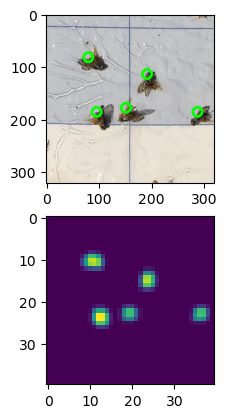

In [51]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.imshow(cur_img)
ax2.imshow(preds[img_select])
plt.show()